<a href="https://colab.research.google.com/github/Manvi0509/Manvi0509.github.io/blob/main/AQI_PREDICTION_GRU_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow pandas scikit-learn matplotlib requests


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

In [4]:
data = pd.read_csv('/content/DELHI_AQI_NEW.csv', parse_dates=['Timestamp'], index_col='Timestamp')
print(data.head())

            AQI  Max temp  Min temp  precip  windspeed  winddir      PM2.5   \
Timestamp                                                                     
01-01-2018  406      20.0       6.0     0.0        9.4    296.6  304.632353   
02-01-2018  418      17.4       8.0     0.0        9.4    287.8  280.470588   
03-01-2018  382      17.2       8.0     0.0       11.2    270.8  219.991765   
04-01-2018  366      20.2       5.0     0.0       13.0    120.0  245.572941   
05-01-2018  390      19.0       7.4     0.0       11.2    112.3  241.658235   

                 PM10        NO2       SO2   Max 8-h CO  Max 8-h Ozone  
Timestamp                                                               
01-01-2018  440.251667  60.750588  17.06625    1.987692      34.130714  
02-01-2018  439.810833  53.138824  11.88500    1.708571      30.698571  
03-01-2018  344.039167  53.151765  10.18875    1.597143      31.054286  
04-01-2018  395.775833  60.116471  14.30250    1.477857      35.047143  
05-01-20

In [5]:

# We will use the 'AQI' column for prediction
aqi_data = data[['AQI']]

In [19]:
aqi_data

,AQI
Timestamp,
01-01-2018,406
02-01-2018,418
03-01-2018,382
04-01-2018,366
05-01-2018,390
...,...
27-12-2023,380
28-12-2023,358
29-12-2023,382


In [6]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_aqi = scaler.fit_transform(aqi_data.values)


In [21]:
print(scaler)
print(scaled_aqi)

MinMaxScaler()
[[0.80701754]
 [0.83333333]
 [0.75438596]
 ...
 [0.75438596]
 [0.79385965]
 [0.75438596]]


In [7]:
# Function to create sequences of data for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])  # Previous 'seq_length' AQI values
        y.append(data[i, 0])  # Next AQI value (prediction)
    return np.array(X), np.array(y)

In [8]:
# Parameters
SEQ_LENGTH = 30  # Use the past 30 days to predict the next day's AQI
train_size = int(len(scaled_aqi) * 0.8)  # 80% for training, 20% for testing

In [9]:
# Create sequences for training and testing data
X, y = create_sequences(scaled_aqi, SEQ_LENGTH)

In [10]:
# Split into train and test sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:
# Reshape data to match the input format of the GRU (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [12]:
# Build the GRU model
model = Sequential()
model.add(GRU(64, return_sequences=False, input_shape=(SEQ_LENGTH, 1)))  # GRU layer with 64 units
model.add(Dense(1))  # Output a single value (next day's AQI)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')


In [15]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict AQI using the test set
predicted_aqi = model.predict(X_test)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0708
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0119
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0104
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0109
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0096
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0103
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0101
Epoch 13/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0106
Epoch 14/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0108
Epoch 15/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0104
Epoc

In [16]:
# Invert the scaling of the predicted and actual values
predicted_aqi = scaler.inverse_transform(predicted_aqi)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

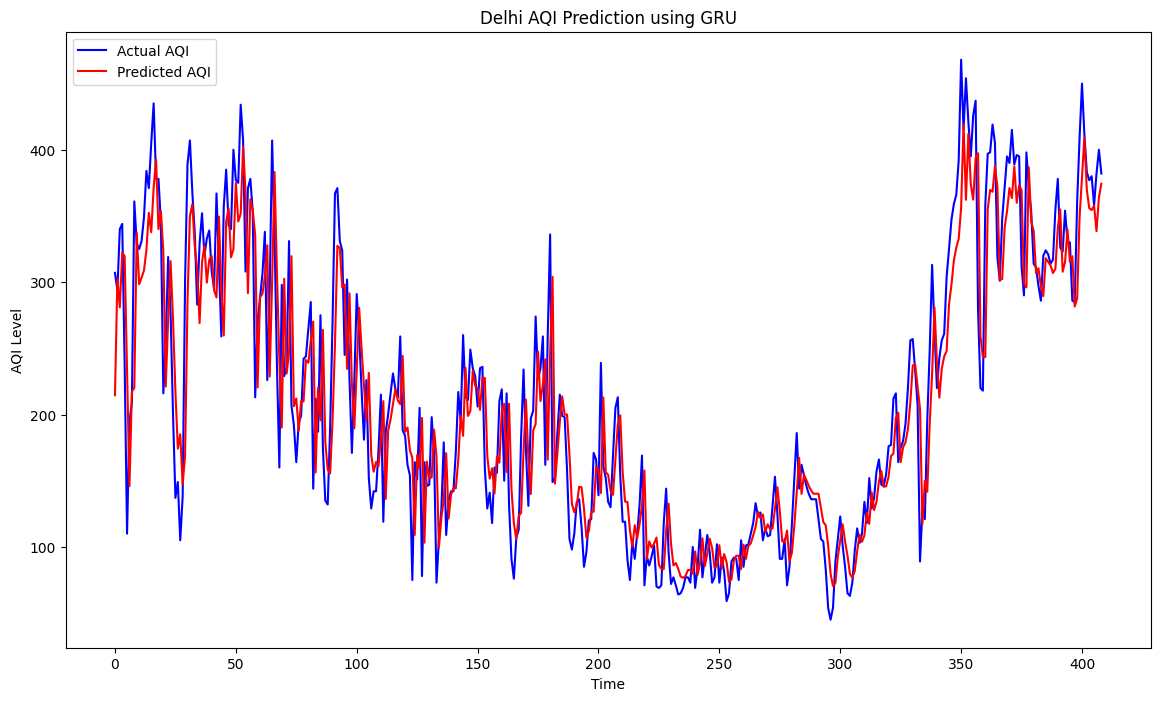

In [17]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(y_test_actual, color='blue', label='Actual AQI')
plt.plot(predicted_aqi, color='red', label='Predicted AQI')
plt.title('Delhi AQI Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('AQI Level')
plt.legend()
plt.show()

In [18]:
# Evaluate the model performance
mse = np.mean((predicted_aqi - y_test_actual) ** 2)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 1996.7269410397835
